<a href="https://colab.research.google.com/github/guilhermegranchopro/Eco-AI.ly/blob/main/LSTM/LSTM_Carbon_Intensity_Hourly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão da Intensidade de Carbono (LCA) com LSTM

 ## Objetivo Geral  
Treinar uma **LSTM** para prever a **intensidade de carbono (LCA)** nas próximas 24 horas, com base nos últimos 24 registros.  
A previsão será feita como uma **classificação em uma escala de 0 a 5**, onde os valores são inferidos da amplitude histórica dos dados de LCA.

 ---

## Etapas do Projeto  

### **1. Aquisição e Organização dos Dados**  
#### 📌 Leitura dos CSVs:  
- Carregar os arquivos:  
  - `PT_2021_hourly.csv`  
  - `PT_2022_hourly.csv`  
  - `PT_2023_hourly.csv`  
- Extrair as colunas relevantes:  
  - **Código temporal (data e hora)**  
  - **Intensidade de carbono (LCA)**  
- Unificar os três CSVs em um único **dataframe**.  

#### 📌 Tratamento de Dados Faltantes:  
- Identificar e tratar dados ausentes ou inconsistentes (removendo ou preenchendo valores).  

#### 📌 Ordenação Temporal:  
- Garantir que os dados estejam **ordenados cronologicamente** para preservar a sequência temporal.  

---

### **2. Construção da Escala de Classificação**  
#### 📌 Cálculo dos Limiares da Escala (0 a 5):  
- Obter os valores **mínimo e máximo históricos** da intensidade de carbono (LCA).  
- Dividir a amplitude `[mínimo, máximo]` em **5 intervalos iguais**:  
  - **Intervalo 0**: Valores abaixo de `x`.  
  - **Intervalos 1 a 4**: Divisões intermediárias.  
  - **Intervalo 5**: Valores acima de `y`.  

#### 📌 Mapeamento para Classes:  
- Criar uma **nova coluna** no dataframe para armazenar as classes (0 a 5) com base na escala calculada.  

---

### **3. Pré-processamento dos Dados**  
#### 📌 Criação das Sequências Temporais:  
- Gerar sequências de entrada com **24 horas de dados** (janelas deslizantes).  
- **Entrada**: Valores de **LCA das últimas 24 horas**.  
- **Saída**: Classe (0 a 5) correspondente à previsão das **próximas 24 horas**.  

#### 📌 Divisão do Dataset:  
- **Treino (70%)**  
- **Validação (15%)**  
- **Teste (15%)**  

#### 📌 Normalização dos Dados de Entrada (Opcional):  
- Caso necessário, normalizar os valores de LCA para uma escala específica, como **[0,1]**.  
- **Justificar e documentar a escolha.**  

---

### **4. Construção e Treinamento do Modelo LSTM**  
#### 📌 Configuração do Modelo:  
- **Arquitetura**:  
  - Uma ou mais camadas **LSTM**.  
  - Camadas **densas** para produzir a saída.  
  - Função de ativação **softmax** na última camada para classificação.  

#### 📌 Configuração do Treinamento:  
- **Perda**: `SparseCategoricalCrossentropy` (para classificação).  
- **Otimizador**: `Adam`.  
- **Métrica de Avaliação**: **Acurácia** ou outra métrica relevante.  

#### 📌 Treinamento do Modelo:  
- Treinar o modelo com o **conjunto de treinamento**.  
- Validar o desempenho durante o treinamento com o **conjunto de validação**.  

---

### **5. Avaliação do Modelo**  
#### 📌 Avaliação nos Dados de Teste:  
- Testar o modelo no **conjunto de teste**.  
- Calcular métricas como:  
  - **Acurácia**  
  - **Precisão**  
  - **Recall**  
  - **F1-score**  

#### 📌 Análise de Resultados:  
- Gerar **gráficos de desempenho**:  
  - Curvas de aprendizado (**perda e acurácia** durante o treinamento).  
  - **Matriz de confusão** para as classes (0 a 5).  

---

### **6. Testes e Ajustes**  
#### 📌 Testes com Dados Reais:  
- Verificar o desempenho do modelo em **dados não vistos** (se disponíveis).  

#### 📌 Ajustes no Modelo:  
- Ajustar **hiperparâmetros**, como:  
  - Número de **unidades LSTM**.  
  - **Taxa de aprendizado**.  
  - **Tamanho do batch**.  

#### 📌 Testes com Normalização de Entrada:  
- Comparar o desempenho do modelo **com e sem normalização**.  

---

### **7. Documentação e Finalização**  
#### 📌 Documentação Completa:  
- Explicar cada etapa do **pipeline**, incluindo **decisões e justificativas**.  

#### 📌 Entrega do Código:  
- Organizar o código em um **notebook estruturado**:  
  - **Seções** para cada etapa do pipeline.  
  - **Gráficos** e explicações nos locais apropriados.  

#### 📌 Conclusão:  
- **Resumo dos resultados alcançados**.  
- **Sugestões para trabalhos futuros**.  

---

## Observações Importantes  
✅ **Escala de Saída (0 a 5):** Deve ser baseada nos valores históricos dos CSVs.  
✅ **Normalização de Entrada:** Deve ser justificada e explicada.  
✅ **Foco em Classificação:** O problema será tratado como **uma tarefa de classificação com 6 classes**.

# Etapa 1: Aquisição e Organização dos Dados

1. Montar o Google Drive no Google Colab.
2. Carregar os três CSVs diretamente do Google Drive.
3. Combinar os dados em um único dataframe, mantendo apenas as colunas relevantes:
  * Código temporal (data e hora).
  * Intensidade de carbono (LCA).
4. Garantir a ordenação cronológica dos dados.
5. Tratar dados faltantes ou inconsistentes.

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Bibliotecas necessárias
import pandas as pd

path = '/content/drive/My Drive/Data/Eletricity_Maps/Portugal/Hourly/'

# Caminhos dos arquivos no Google Drive
file_2021 = path + 'PT_2021_hourly.csv'
file_2022 = path + 'PT_2022_hourly.csv'
file_2023 = path + 'PT_2023_hourly.csv'

# Leitura dos arquivos CSV
df_2021 = pd.read_csv(file_2021)
df_2022 = pd.read_csv(file_2022)
df_2023 = pd.read_csv(file_2023)

# Combinação dos dados
df_combined = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

# Seleção das colunas relevantes
df_combined = df_combined[['Datetime (UTC)', 'Carbon Intensity gCO₂eq/kWh (LCA)']]  # Substitua 'timestamp' e 'LCA' pelos nomes reais das colunas

# Ordenação cronológica
df_combined['Datetime (UTC)'] = pd.to_datetime(df_combined['Datetime (UTC)'])
df_combined = df_combined.sort_values(by='Datetime (UTC)')

Dados combinados e organizados:
       Datetime (UTC)  Carbon Intensity gCO₂eq/kWh (LCA)
0 2021-01-01 00:00:00                             104.10
1 2021-01-01 01:00:00                             105.25
2 2021-01-01 02:00:00                             112.77
3 2021-01-01 03:00:00                             106.84
4 2021-01-01 04:00:00                             103.59

Resumo dos dados combinados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Datetime (UTC)                     26280 non-null  datetime64[ns]
 1   Carbon Intensity gCO₂eq/kWh (LCA)  26280 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 410.8 KB
None


In [ ]:
# Exibição das primeiras linhas
print("Dados combinados e organizados:")
print(df_combined.head())

Dados combinados e organizados:
       Datetime (UTC)  Carbon Intensity gCO₂eq/kWh (LCA)
0 2021-01-01 00:00:00                             104.10
1 2021-01-01 01:00:00                             105.25
2 2021-01-01 02:00:00                             112.77
3 2021-01-01 03:00:00                             106.84
4 2021-01-01 04:00:00                             103.59


In [ ]:
# Verificar dados ausentes antes de remover
missing_data = df_combined[df_combined.isnull().any(axis=1)]

# Exibir linhas com valores ausentes
print("\nLinhas com valores ausentes:")
print(missing_data)

# Exibir contagem de valores ausentes por coluna
print("\nContagem de valores ausentes por coluna:")
print(df_combined.isnull().sum())

# Tratamento de dados faltantes (remover linhas com valores ausentes)
df_combined = df_combined.dropna()

# Exibição do resumo após tratamento
print("\nResumo dos dados após remoção de valores ausentes:")
print(df_combined.info())


Linhas com valores ausentes:
Empty DataFrame
Columns: [Datetime (UTC), Carbon Intensity gCO₂eq/kWh (LCA)]
Index: []

Contagem de valores ausentes por coluna:
Datetime (UTC)                       0
Carbon Intensity gCO₂eq/kWh (LCA)    0
dtype: int64

Resumo dos dados após remoção de valores ausentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Datetime (UTC)                     26280 non-null  datetime64[ns]
 1   Carbon Intensity gCO₂eq/kWh (LCA)  26280 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 410.8 KB
None


In [ ]:
# Exibição do resumo dos dados
print("\nResumo dos dados combinados:")
print(df_combined.info())


Resumo dos dados combinados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Datetime (UTC)                     26280 non-null  datetime64[ns]
 1   Carbon Intensity gCO₂eq/kWh (LCA)  26280 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 410.8 KB
None


# Etapa 2: Construção da Escala de Classificação (0 a 5).

Transformar a intensidade de carbono (LCA) em uma escala de classificação de 0 a 5, utilizando a amplitude dos valores históricos.

1. Calcular a amplitude dos dados históricos de LCA:

  * Obter o valor mínimo (min_LCA) e o valor máximo (max_LCA) da intensidade de carbono nos dados combinados.

2. Criar os intervalos da escala:

  * Dividir a amplitude
[
𝑚
𝑖
𝑛
𝐿
𝐶
𝐴
,
𝑚
𝑎
𝑥
𝐿
𝐶
𝐴
]
[min
L
​
 CA,max
L
​
 CA] em 5 partes iguais para definir os limiares
𝑥
1,
𝑥
2
,
𝑥
3
,
𝑥
4
​
 .
  * O valor 0 representará qualquer valor abaixo de
𝑥
1
 , enquanto o valor 5 representará qualquer valor acima de
𝑥
4
 .
3. Mapear os valores de LCA para a escala de classificação:

  * Criar uma nova coluna LCA_Class onde cada valor de LCA será transformado em uma
das 6 classes (0 a 5).

In [ ]:
# Cálculo da amplitude da intensidade de carbono (LCA)
min_LCA = df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'].min()
max_LCA = df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'].max()

# Definição dos intervalos para a escala de 0 a 5
intervalos = pd.cut(df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'], bins=6, labels=[0, 1, 2, 3, 4, 5])

# Criar uma nova coluna com a classificação LCA_Class
df_combined['LCA_Class'] = intervalos

# Exibir amostra da nova classificação
print("\nAmostra de dados com a nova classificação LCA_Class:")
print(df_combined[['Datetime (UTC)', 'Carbon Intensity gCO₂eq/kWh (LCA)', 'LCA_Class']].head())


Amostra de dados com a nova classificação LCA_Class:
       Datetime (UTC)  Carbon Intensity gCO₂eq/kWh (LCA) LCA_Class
0 2021-01-01 00:00:00                             104.10         1
1 2021-01-01 01:00:00                             105.25         1
2 2021-01-01 02:00:00                             112.77         1
3 2021-01-01 03:00:00                             106.84         1
4 2021-01-01 04:00:00                             103.59         1


In [ ]:
# Obter os intervalos usados para as classes
intervalos = pd.cut(df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'], bins=6)

# Extraindo os limites dos intervalos
bins = intervalos.cat.categories

# Exibir os intervalos correspondentes às classes (0 a 5)
print("\nIntervalos correspondentes às classes (0 a 5):")
for idx, intervalo in enumerate(bins):
    print(f"Classe {idx}: {intervalo}")


Intervalos correspondentes às classes (0 a 5):
Classe 0: (28.847, 99.782]
Classe 1: (99.782, 170.293]
Classe 2: (170.293, 240.805]
Classe 3: (240.805, 311.317]
Classe 4: (311.317, 381.828]
Classe 5: (381.828, 452.34]


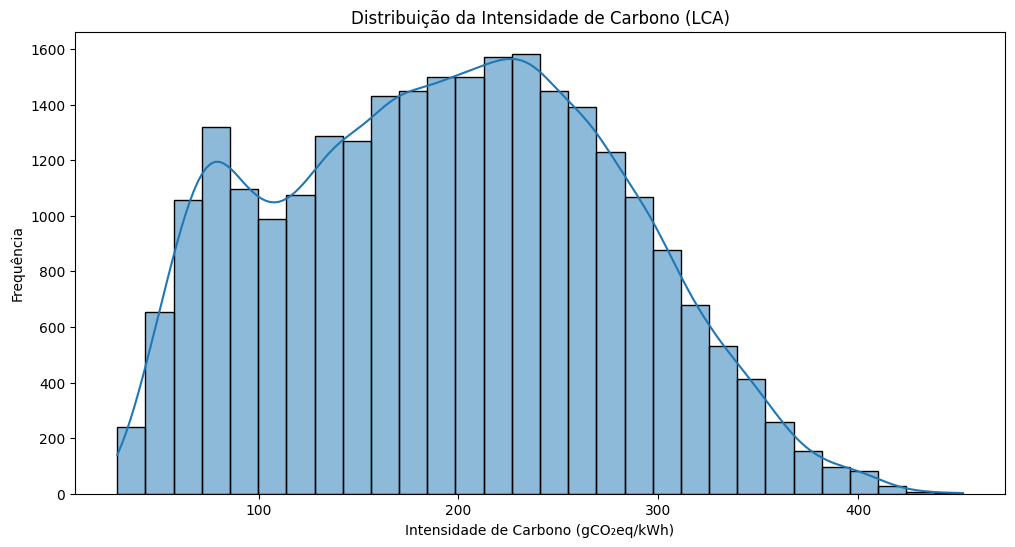

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma da intensidade de carbono (LCA)
plt.figure(figsize=(12, 6))
sns.histplot(df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'], bins=30, kde=True)
plt.xlabel('Intensidade de Carbono (gCO₂eq/kWh)')
plt.ylabel('Frequência')
plt.title('Distribuição da Intensidade de Carbono (LCA)')
plt.show()

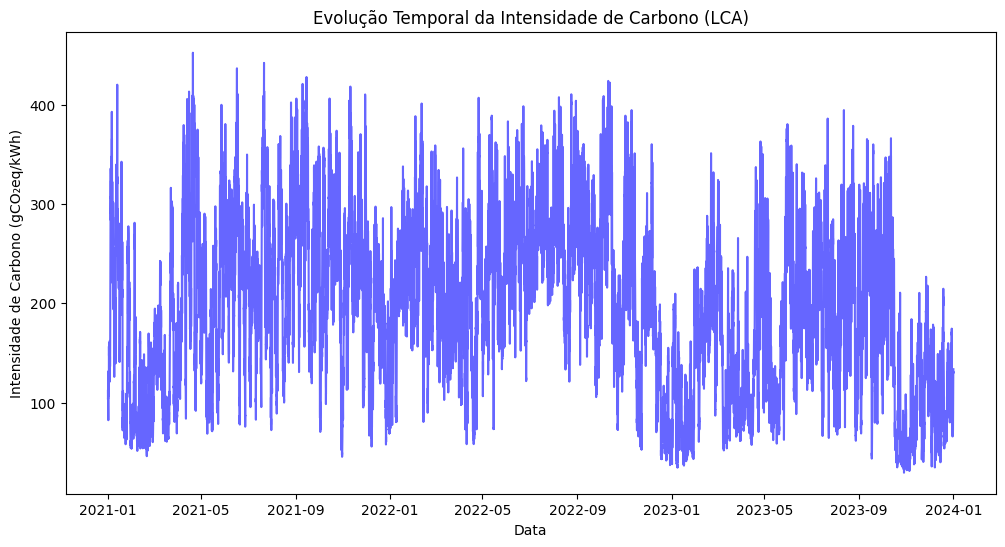

In [ ]:
# Série temporal da intensidade de carbono
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Datetime (UTC)'], df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'], color='blue', alpha=0.6)
plt.xlabel('Data')
plt.ylabel('Intensidade de Carbono (gCO₂eq/kWh)')
plt.title('Evolução Temporal da Intensidade de Carbono (LCA)')
plt.show()

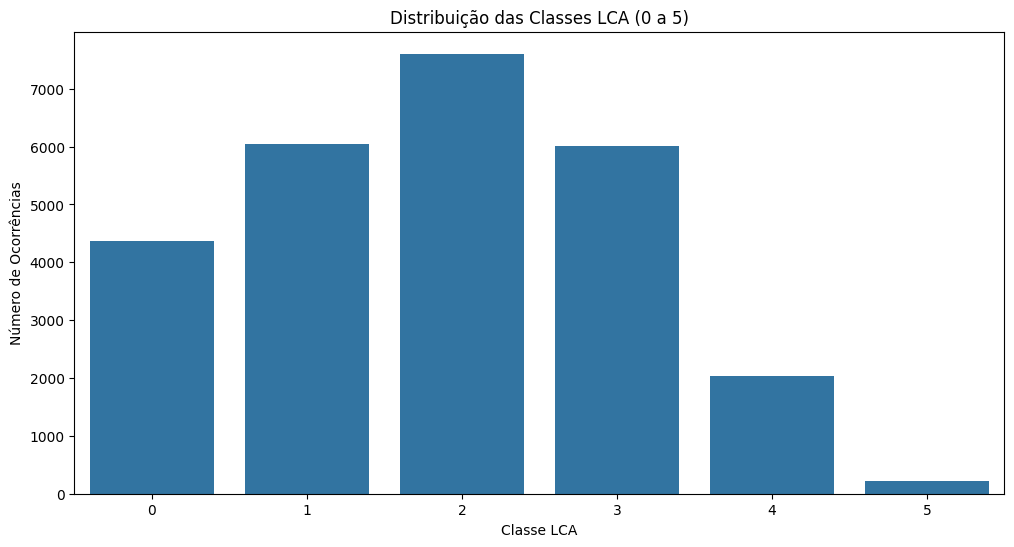

In [ ]:
# Contagem das classes
plt.figure(figsize=(12, 6))
sns.countplot(x=df_combined['LCA_Class'])
plt.xlabel('Classe LCA')
plt.ylabel('Número de Ocorrências')
plt.title('Distribuição das Classes LCA (0 a 5)')
plt.show()

<Figure size 1200x600 with 0 Axes>

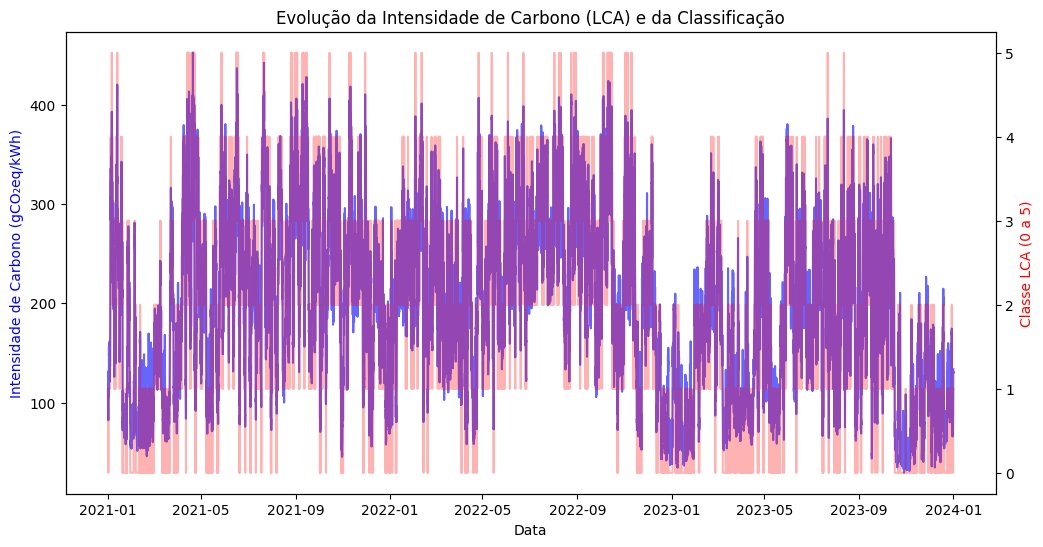

In [ ]:
# Série Temporal com LCA e Classes
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(df_combined['Datetime (UTC)'], df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'], color='blue', alpha=0.6, label='LCA')
ax2.plot(df_combined['Datetime (UTC)'], df_combined['LCA_Class'], color='red', alpha=0.3, label='Classe LCA')

ax1.set_xlabel('Data')
ax1.set_ylabel('Intensidade de Carbono (gCO₂eq/kWh)', color='blue')
ax2.set_ylabel('Classe LCA (0 a 5)', color='red')
plt.title('Evolução da Intensidade de Carbono (LCA) e da Classificação')
plt.show()

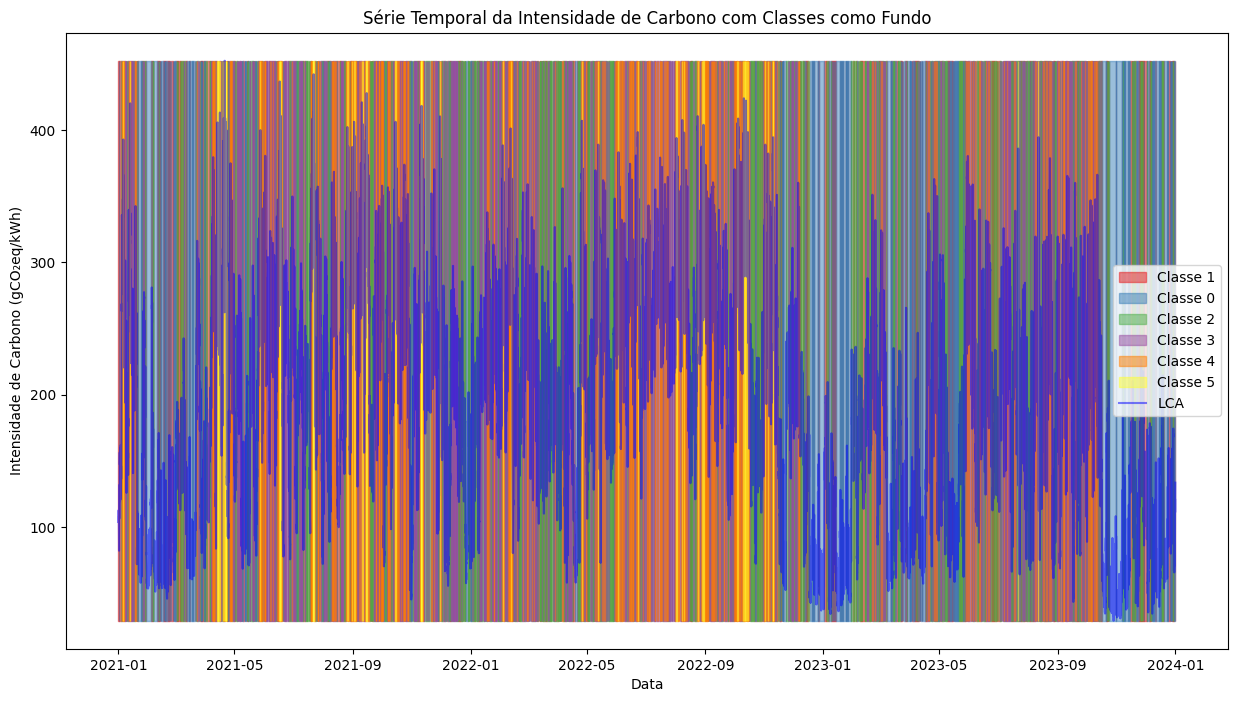

In [ ]:
# Série Temporal com LCA e Classes como fundo
plt.figure(figsize=(15, 8))

# Adicionando as cores de fundo baseadas nas classes
classes = df_combined['LCA_Class'].unique()
colors = sns.color_palette('Set1', n_colors=len(classes))

for cls, color in zip(classes, colors):
    mask = df_combined['LCA_Class'] == cls
    plt.fill_between(
        df_combined['Datetime (UTC)'],
        df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'].min(),
        df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'].max(),
        where=mask,
        color=color,
        alpha=0.5,
        label=f'Classe {cls}'
    )

# Adicionando a linha da intensidade de carbono
plt.plot(df_combined['Datetime (UTC)'], df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'], color='blue', label='LCA', alpha=0.5)

# Configuração dos eixos e título
plt.xlabel('Data')
plt.ylabel('Intensidade de Carbono (gCO₂eq/kWh)')
plt.title('Série Temporal da Intensidade de Carbono com Classes como Fundo')
plt.legend()
plt.show()

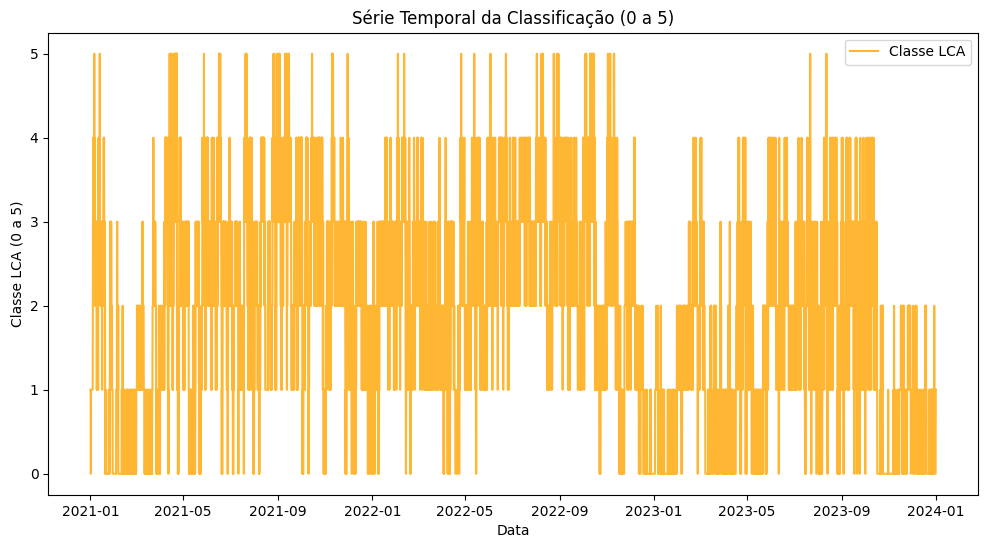

In [ ]:
# Série Temporal da Classificação (0 a 5)
plt.figure(figsize=(12, 6))
plt.plot(df_combined['Datetime (UTC)'], df_combined['LCA_Class'], color='orange', alpha=0.8, label='Classe LCA')
plt.xlabel('Data')
plt.ylabel('Classe LCA (0 a 5)')
plt.title('Série Temporal da Classificação (0 a 5)')
plt.legend()
plt.show()

# Etapa 3: Preparação dos Dados para a LSTM


Converter os dados em sequências temporais adequadas para treinar o modelo LSTM. A entrada será baseada nos últimos 24 datapoints, e a saída será a classificação das próximas 24 horas.

1. Definir o tamanho da janela temporal:

  * Cada entrada será formada por uma sequência de 24 horas (últimos 24 datapoints).
A saída será a classe (0 a 5) correspondente às próximas 24 horas.

2. Criar as sequências temporais:

  * Usar um loop para transformar o dataframe em conjuntos de entradas (X) e saídas (y) adequados para a LSTM.

3. Dividir os dados:

  * Dividir em conjuntos de treinamento (70%), validação (15%) e teste (15%).

4. Normalização (opcional):

  * Decidir se os valores de entrada (LCA) devem ser normalizados. Caso seja necessário, normalizar apenas os valores de entrada (não as classes).

In [ ]:
import numpy as np

# Função para criar sequências temporais
def criar_sequencias_temporais(data, target_col, janela_entrada=24, janela_saida=24):
    X, y = [], []
    for i in range(len(data) - janela_entrada - janela_saida + 1):
        # Entrada: últimos 'janela_entrada' valores
        X.append(data.iloc[i:i + janela_entrada][target_col].values)
        # Saída: próxima classe após 'janela_saida'
        y.append(data.iloc[i + janela_entrada:i + janela_entrada + janela_saida]['LCA_Class'].mode()[0])
    return np.array(X), np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Criar as sequências
X, y = criar_sequencias_temporais(df_combined, 'Carbon Intensity gCO₂eq/kWh (LCA)')

# Dividir os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Exibir os tamanhos dos conjuntos
print("\nTamanho dos conjuntos:")
print(f"Treinamento: {X_train.shape[0]} amostras")
print(f"Validação: {X_val.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")


Tamanho dos conjuntos:
Treinamento: 18363 amostras
Validação: 3935 amostras
Teste: 3935 amostras


# Etapa 4: Construção e Treinamento do Modelo LSTM

Criar uma arquitetura LSTM que use as sequências temporais geradas (últimos 24 pontos) como entrada e preveja a classificação de intensidade de carbono (0 a 5) para as próximas 24 horas.

1. Definir a arquitetura da LSTM:

  * Usar uma ou mais camadas LSTM para capturar padrões temporais.
  * Adicionar camadas densas para mapear as saídas às 6 classes (0 a 5).

2. Configuração do modelo:

  * Função de perda: SparseCategoricalCrossentropy (problema de classificação).
  * Métrica: Acurácia.
  * Otimizador: Adam (bom para problemas com dados sequenciais).

3. Treinamento do modelo:

  * Definir número de épocas e tamanho do batch.
  * Usar o conjunto de validação para monitorar o desempenho.

4. Salvar e avaliar o modelo:

  * Avaliar no conjunto de teste.
  * Salvar o modelo treinado para uso posterior.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Construção do modelo LSTM
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])

# Compilação do modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Resumo do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,174 (74.90 KB)

 Trainable params: 19,174 (74.90 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callback para parar o treinamento cedo, caso não haja melhora
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5072 - loss: 1.1827 - val_accuracy: 0.5868 - val_loss: 0.9570
Epoch 2/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.5951 - loss: 0.9481 - val_accuracy: 0.6102 - val_loss: 0.9370
Epoch 3/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.6046 - loss: 0.9326 - val_accuracy: 0.5855 - val_loss: 0.9883
Epoch 4/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6052 - loss: 0.9331 - val_accuracy: 0.5997 - val_loss: 0.9262
Epoch 5/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.6034 - loss: 0.9288 - val_accuracy: 0.6076 - val_loss: 0.9301
Epoch 6/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6024 - loss: 0.9321 - val_accuracy: 0.6046 - val_loss: 0.9218
Epoch 7/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.6059 - loss: 0.9294 - val_accuracy: 0.6086 - val_loss: 0.9279
Epoch 8/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6086 - loss: 0.9335 - 

In [ ]:
# Avaliação do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nLoss no conjunto de teste: {loss}")
print(f"Acurácia no conjunto de teste: {accuracy}")

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5851 - loss: 0.9728

Loss no conjunto de teste: 0.9533267617225647
Acurácia no conjunto de teste: 0.5903430581092834


In [ ]:
# Salvar o modelo
model.save('/content/drive/My Drive/Modelos/LSTM_LCA_Model.h5')

# Etapa 5: Avaliação e Análise de Resultados

Avaliar o desempenho do modelo treinado no conjunto de teste, identificar possíveis áreas de melhoria e visualizar os resultados.

1. Avaliação do Modelo no Conjunto de Teste:

  * Calcular métricas como acurácia, precisão, recall e F1-score por classe.
  * Gerar a matriz de confusão para analisar o desempenho do modelo em cada classe.

2. Gráficos de Desempenho:

  * Curvas de perda e acurácia: Para treino e validação ao longo das épocas.
  * Matriz de confusão: Visualizar onde o modelo acerta e erra.

3. Predições no Conjunto de Teste:

  * Fazer predições no conjunto de teste.
  * Comparar as classes previstas com as reais.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Análise de resultados
# Predições no conjunto de teste
y_pred = np.argmax(model.predict(X_test), axis=1)

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73       641
           1       0.58      0.54      0.56       920
           2       0.54      0.64      0.58      1201
           3       0.56      0.63      0.59       943
           4       0.69      0.13      0.22       223
           5       0.00      0.00      0.00         7

    accuracy                           0.59      3935
   macro avg       0.53      0.44      0.45      3935
weighted avg       0.60      0.59      0.58      3935



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


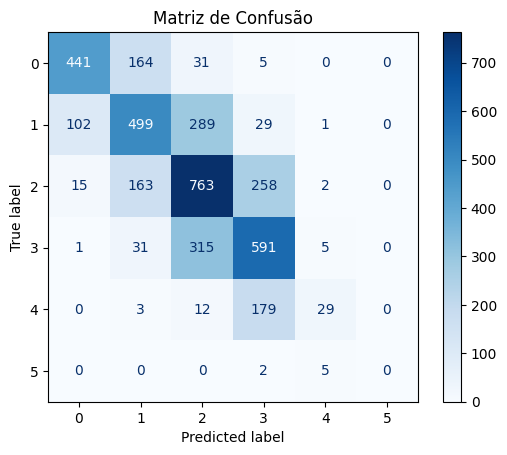

In [ ]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1, 2, 3, 4, 5]).plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

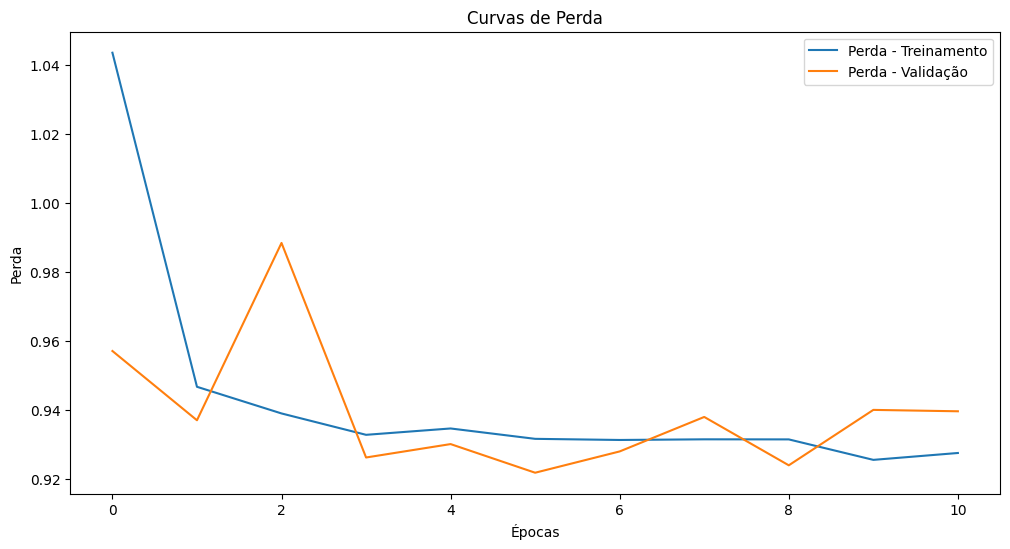

In [ ]:
# Gráficos de desempenho
# Curvas de perda e acurácia
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda - Treinamento')
plt.plot(history.history['val_loss'], label='Perda - Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Curvas de Perda')
plt.legend()
plt.show()

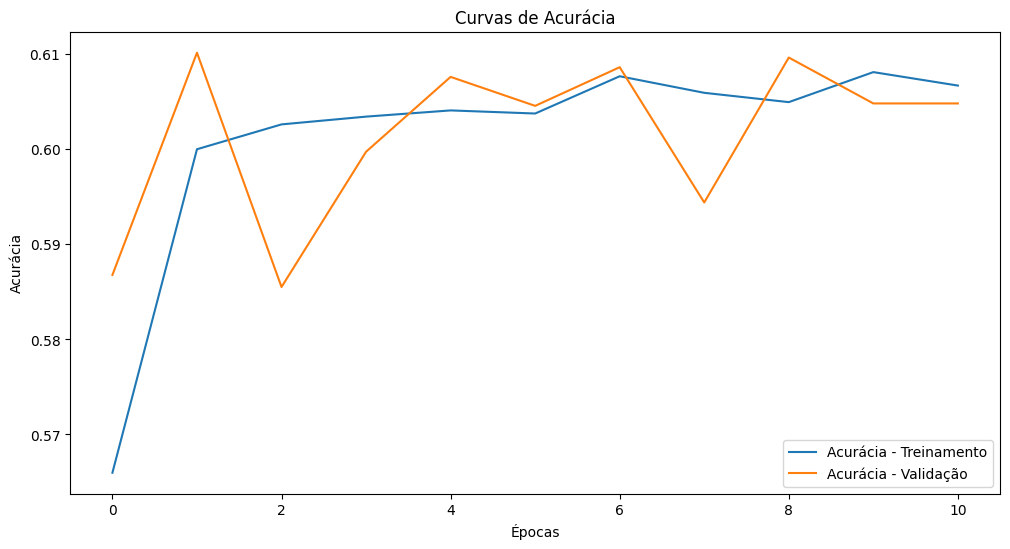

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Acurácia - Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Curvas de Acurácia')
plt.legend()
plt.show()

In [ ]:
# Tabela de desempenho no conjunto de teste
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("\nTabela de Desempenho do Modelo:")
print(report_df)


Tabela de Desempenho do Modelo:
              precision    recall  f1-score      support
0              0.788909  0.687988  0.735000   641.000000
1              0.580233  0.542391  0.560674   920.000000
2              0.541135  0.635304  0.584450  1201.000000
3              0.555451  0.626723  0.588939   943.000000
4              0.690476  0.130045  0.218868   223.000000
5              0.000000  0.000000  0.000000     7.000000
accuracy       0.590343  0.590343  0.590343     0.590343
macro avg      0.526034  0.437075  0.447989  3935.000000
weighted avg   0.601569  0.590343  0.582734  3935.000000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


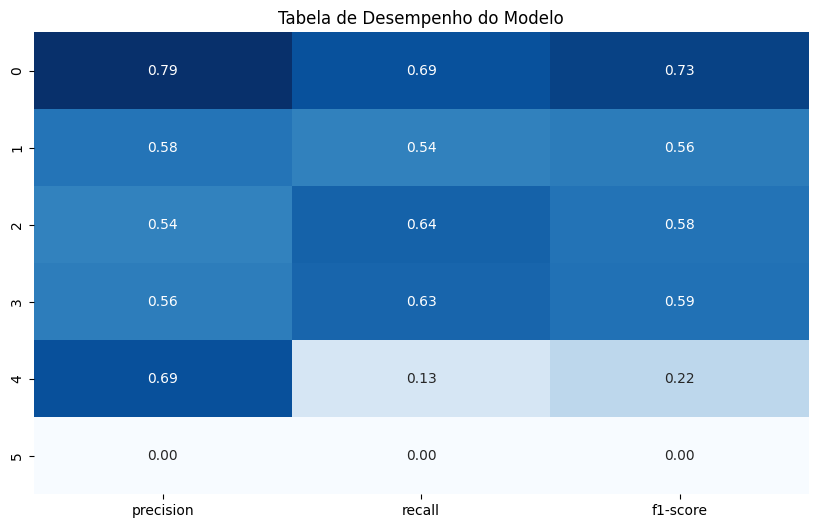

In [ ]:
# Exibir a tabela como um gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-3, :-1], annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Tabela de Desempenho do Modelo')
plt.show()

# Etapa 6: Teste e Ajustes do Modelo

Refinar o modelo LSTM para melhorar seu desempenho com base nos resultados obtidos na etapa anterior.

1. Análise dos Resultados:

  * Revisar a matriz de confusão e as métricas por classe.
  * Identificar classes onde o modelo teve baixa performance e entender os possíveis motivos (dados desbalanceados, dificuldade em capturar padrões, etc.).

2. Ajustes de Hiperparâmetros:

  * Experimentar diferentes configurações de hiperparâmetros:
    * Número de unidades na LSTM.
    * Número de camadas (adicionar uma segunda LSTM, por exemplo).
    * Taxa de aprendizado.
    * Tamanho do batch.

3. Regularização:

  *   * Adicionar técnicas de regularização para evitar overfitting:
  * Dropout em camadas densas ou LSTM.
  * Aumentar o valor de patience no Early Stopping.

4. Normalização dos Dados:

  * Verificar se a normalização dos valores de entrada melhora a performance.
  * Aplicar técnicas como Min-Max Scaling ou Standard Scaling.

5. Teste com Mais Dados:

  * Garantir que o modelo esteja sendo treinado com um volume adequado de dados.
Caso tenha dados adicionais, incorporá-los ao treinamento.

6. Salvamento dos Melhores Modelos:

  * Salvar modelos com diferentes configurações e comparar seus desempenhos.

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

path = '/content/drive/My Drive/Data/Eletricity_Maps/Portugal/Hourly/'

# Caminhos dos arquivos no Google Drive
file_2021 = path + 'PT_2021_hourly.csv'
file_2022 = path + 'PT_2022_hourly.csv'
file_2023 = path + 'PT_2023_hourly.csv'

# Leitura dos arquivos CSV
df_2021 = pd.read_csv(file_2021)
df_2022 = pd.read_csv(file_2022)
df_2023 = pd.read_csv(file_2023)

# Combinação dos dados
df_combined = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

# Seleção das colunas relevantes
df_combined = df_combined[['Datetime (UTC)', 'Carbon Intensity gCO₂eq/kWh (LCA)']]

# Ordenação cronológica
df_combined['Datetime (UTC)'] = pd.to_datetime(df_combined['Datetime (UTC)'])
df_combined = df_combined.sort_values(by='Datetime (UTC)')

# Exibição das primeiras linhas
print("Dados combinados e organizados:")
print(df_combined.head())

# Verificar dados ausentes antes de remover
missing_data = df_combined[df_combined.isnull().any(axis=1)]

# Exibir linhas com valores ausentes
print("\nLinhas com valores ausentes:")
print(missing_data)

# Exibir contagem de valores ausentes por coluna
print("\nContagem de valores ausentes por coluna:")
print(df_combined.isnull().sum())

# Tratamento de dados faltantes (remover linhas com valores ausentes)
df_combined = df_combined.dropna()

# Exibição do resumo após tratamento
print("\nResumo dos dados após remoção de valores ausentes:")
print(df_combined.info())

# Cálculo da amplitude da intensidade de carbono (LCA)
min_LCA = df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'].min()
max_LCA = df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'].max()

# Normalização dos dados
def normalize_data(data, column):
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[[column]])
    return data, scaler

df_combined, scaler = normalize_data(df_combined, 'Carbon Intensity gCO₂eq/kWh (LCA)')

# Definição dos intervalos para a escala de 0 a 5
intervalos = pd.cut(df_combined['Carbon Intensity gCO₂eq/kWh (LCA)'], bins=6, labels=[0, 1, 2, 3, 4, 5])

# Criar uma nova coluna com a classificação LCA_Class
df_combined['LCA_Class'] = intervalos

# Exibir amostra da nova classificação
print("\nAmostra de dados com a nova classificação LCA_Class:")
print(df_combined[['Datetime (UTC)', 'Carbon Intensity gCO₂eq/kWh (LCA)', 'LCA_Class']].head())

# Função para criar sequências temporais
def criar_sequencias_temporais(data, target_col, janela_entrada=24, janela_saida=24):
    X, y = [], []
    for i in range(len(data) - janela_entrada - janela_saida + 1):
        # Entrada: últimos 'janela_entrada' valores
        X.append(data.iloc[i:i + janela_entrada][target_col].values)
        # Saída: próxima classe após 'janela_saida'
        y.append(data.iloc[i + janela_entrada:i + janela_entrada + janela_saida]['LCA_Class'].mode()[0])
    return np.array(X), np.array(y)

# Criar as sequências
X, y = criar_sequencias_temporais(df_combined, 'Carbon Intensity gCO₂eq/kWh (LCA)')

# Dividir os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Exibir os tamanhos dos conjuntos
print("\nTamanho dos conjuntos:")
print(f"Treinamento: {X_train.shape[0]} amostras")
print(f"Validação: {X_val.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")

# Ajustar formato para entrada na LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Construção do modelo LSTM ajustado
model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])

# Compilação do modelo
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumo do modelo
model.summary()

# Callback para parar o treinamento cedo, caso não haja melhora
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping]
)

# Avaliação do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nLoss no conjunto de teste: {loss}")
print(f"Acurácia no conjunto de teste: {accuracy}")

# Salvar o modelo ajustado
model.save('/content/drive/My Drive/Modelos/LSTM_LCA_Model_Adjusted.h5')

# Etapa 7: Documentação e Conclusão

Organizar todos os resultados, gráficos e análises em uma estrutura clara, explicando as escolhas feitas no projeto e fornecendo conclusões baseadas nos resultados.

1. Resumo do Projeto:

  * Objetivo geral: Prever a intensidade de carbono em uma escala de 0 a 5 usando um modelo LSTM.
  * Breve descrição do pipeline:
  * Coleta e pré-processamento de dados.
  * Construção de sequências temporais.
  * Configuração, treinamento e ajuste do modelo LSTM.
  * Análise e visualização dos resultados.

2. Resultados e Análises:

  * Exibição dos principais gráficos:
  * Curvas de perda e acurácia.
  * Matriz de confusão.
  * Tabela de métricas por classe.
  * Destaques sobre o desempenho do modelo:
  * Classes em que o modelo teve maior acurácia.
  * Classes desafiadoras e possíveis motivos.

3. Lições Aprendidas:

  * Reflexão sobre o processo.
  * Impacto de ajustes no desempenho (e.g., normalização, mudanças na arquitetura).

4. Conclusões:

  * Resumo dos insights principais obtidos.
  * Aplicações práticas para prever intensidade de carbono.

5. Próximos Passos:

  * Sugestões para trabalhos futuros:
  * Testar com mais dados históricos.
  * Comparar com outros algoritmos de machine learning.
  * Implementar o modelo em tempo real.


Gerando relatório do projeto...
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Relatório gerado e salvo no Google Drive.


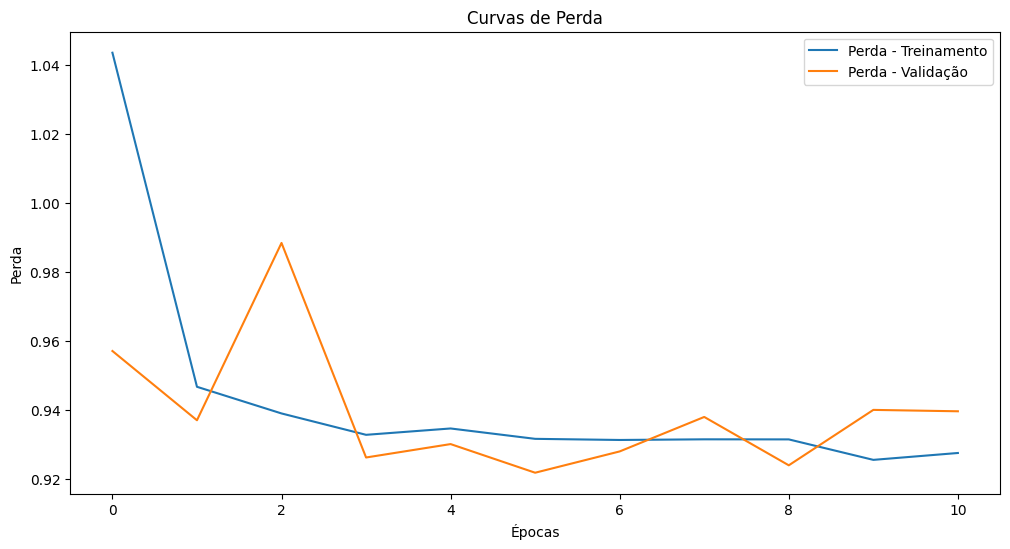

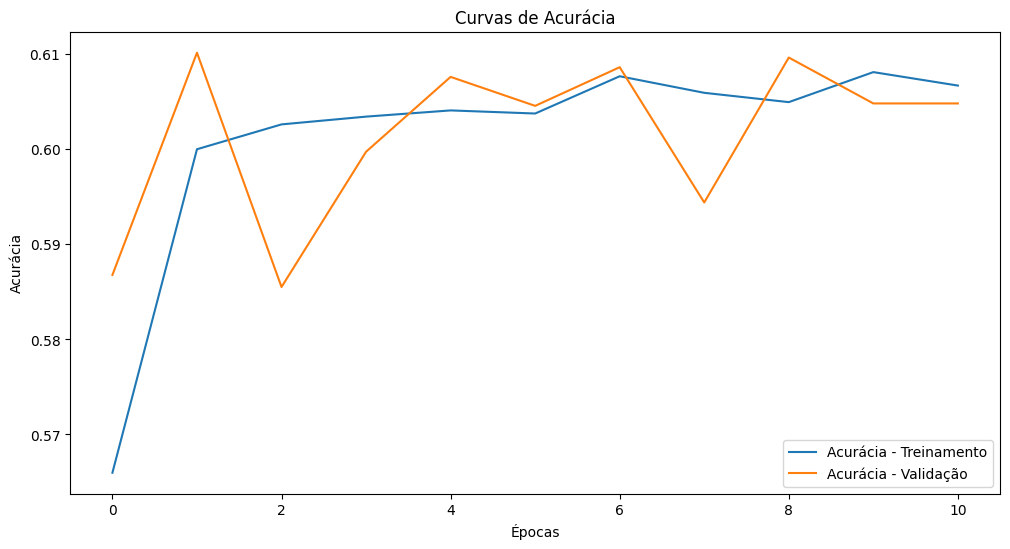

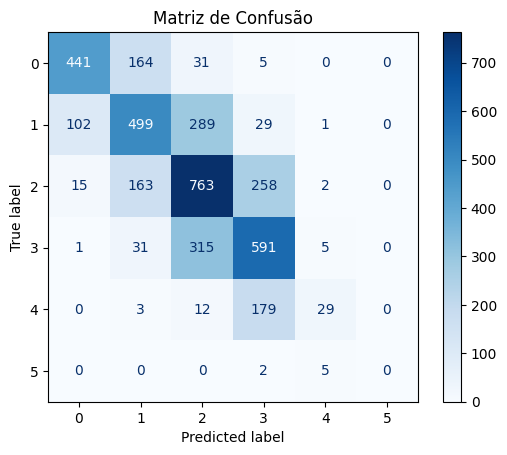

In [ ]:
# Geração do relatório automatizado
print("\nGerando relatório do projeto...")

path2 = '/content/drive/My Drive/Relatórios/Modelo LSTM Intensidade de Carbono/'

# Criar um relatório consolidado com gráficos e análises
with open(path2 + 'LSTM_LCA_Report.html', 'w') as f:
    f.write("<html><head><title>Relatório do Projeto LSTM</title></head><body>")
    f.write("<h1>Relatório do Projeto LSTM para Intensidade de Carbono</h1>")

    # Adicionar resumo do modelo
    f.write("<h2>Resumo do Modelo</h2>")
    f.write(f"<p>Loss no conjunto de teste: {loss:.4f}</p>")
    f.write(f"<p>Acurácia no conjunto de teste: {accuracy:.4f}</p>")

    # Adicionar gráficos de desempenho
    f.write("<h2>Curvas de Desempenho</h2>")
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Perda - Treinamento')
    plt.plot(history.history['val_loss'], label='Perda - Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Curvas de Perda')
    plt.legend()
    plt.savefig(path2 + 'loss_plot.png')
    f.write("<img src='loss_plot.png' width='600'>")

    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Acurácia - Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.title('Curvas de Acurácia')
    plt.legend()
    plt.savefig(path2 + 'accuracy_plot.png')
    f.write("<img src='accuracy_plot.png' width='600'>")

    # Adicionar matriz de confusão
    f.write("<h2>Matriz de Confusão</h2>")
    conf_matrix = confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
    ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1, 2, 3, 4, 5]).plot(cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.savefig(path2 + 'confusion_matrix.png')
    f.write("<img src='confusion_matrix.png' width='600'>")

    # Finalizar relatório
    f.write("</body></html>")

print("Relatório gerado e salvo no Google Drive.")